<a href="https://colab.research.google.com/github/DevashishDutta/Queue-Model-M-M-1/blob/main/M_M_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Choose any ONE of the queue models M/M/1, M/M/4, M/M/1/K and do EITHER of the following tasks:
1. Write a program to simulate a) a Poisson arrival process and exponential serving time; b) calculate each of the probability distributions given in Chapter 7; c) compare with your values as n,t->infinity


Queuing Models M/M/1 Implementation

In [190]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt
import copy

In [150]:
def initilize_empty_list(fn):
  def inner(self):
    return fn(self)

  return inner

Initialization Codes:

In [151]:
class MM1:
  def __init__(self):
    self.tt = int(input('Enter Total time in hours = '))
    self.arr_rate = int(input('Enter arrival rate in (/hour) = '))
    self.ser_rate = int(input('Enter service rate in (/hour) = '))

    # Here Ideal condition is ser_rate > arr_rate always
  @initilize_empty_list
  def initializing_the_parameters(self):
    self.n = int(np.random.poisson(self.arr_rate)*self.tt)
    return self.n

Calculating Inter Arrival Time Codes:

In [152]:
class InterArrivalTime(MM1):
  def __init__(self):
    super().__init__()
    self.inter_arr_time = []
    self.arr_time = []
    self.ser_time = []
 
  def calculating_inter_arrival_time(self):
    for i in range(self.n):
      self.temp = int(np.random.exponential(1/self.arr_rate)*60*60)
      if i==0:
        self.inter_arr_time.append(0)
      else:
        self.inter_arr_time.append(self.temp)

    return np.transpose(self.inter_arr_time)

Calculating Arrival Time Codes:

In [153]:
class ArrivalTime(InterArrivalTime):
  def __init__(self):
      super().__init__() 

  def calculating_arrival_time(self):
    for i in range(self.n):
      if i==0:
        self.arr_time.append(0)
      else:
        self.arr_time.append(self.arr_time[i-1]+self.inter_arr_time[i])

    return np.transpose(self.arr_time)


Calculating Service Time Codes:

In [154]:
class ServiceTime(ArrivalTime):
  def __init__(self):
      super().__init__()

  def calculating_service_time(self):
    while not len(self.ser_time) == self.n:
      self.temp = int(np.random.exponential(1/self.ser_rate)*60*60)
      if not self.temp<1:
        self.ser_time.append(self.temp)

    return np.transpose(self.ser_time)

Calculating Trafic Intensity Codes:

In [155]:
class TraficIntensity(ServiceTime):
  def __init__(self):
      super().__init__()

  def calculating_trafic_intensity(self):
    self.rho = self.arr_rate/self.ser_rate
    return self.rho

Calculating Limiting Distribution Codes:

In [156]:
class LimitingDistribution(TraficIntensity):
  def __init__(self):
      super().__init__()

  def calculating_limiting_distribution(self):
    self.pi = []
    for j in range(self.n):
      self.p = (1-self.rho)*(self.rho**j)
      self.pi.append(self.p)
  
    return np.transpose(self.pi)

Calculating The Average Number Of Customers In The System Codes:

In [157]:
class AvgNumberOfCustomersSys(LimitingDistribution):
  def __init__(self):
      super().__init__()

  def calculating_avg_num_of_cust_in_system(self):
    self.Ls = self.rho/(1-self.rho)
    return self.Ls

Calculating The Average Number Of Customer Spends In The Queue Codes:

In [158]:
class AvgNumOfCustSpendsQ(AvgNumberOfCustomersSys):
  def __init__(self):
      super().__init__()

  def calculating_avg_num_of_cust_spend_queue(self):
    self.Lq = self.Ls - self.rho
    return self.Lq
  

Calculating The Average Time A Customer Spends In The System Codes:

In [159]:
class AvgtimeOfCustSpendsSys(AvgNumOfCustSpendsQ):
  def __init__(self):
      super().__init__()

  def calculating_avg_time_of_cust_in_system(self):
    self.Ws = self.Ls/self.arr_rate
    return self.Ws

Calculating The Average Time A Customer Spends In The Queue Codes:

In [160]:
class AvgtimeOfCustSpendsQ(AvgtimeOfCustSpendsSys):
  def __init__(self):
      super().__init__()

  def calculating_avg_time_of_cust_spend_queue(self):
    self.Wq = self.Ws - (1/self.ser_rate)
    return self.Wq

Visulising Data Codes:

In [175]:
class Visulising(AvgtimeOfCustSpendsQ):
  def __init__(self):
      super().__init__()

  def visulising(self):
    self.fig = plt.figure(figsize=(15,15))
    self.axis_data = self.fig.subplots(2,2)
    self.axis_data[0,0].plot([i for i in range(self.n)], self.pi, color='#008040', marker= 'o', linestyle= '-', alpha= 1)
    self.axis_data[0,0].set_title('Limiting distribution')
    self.axis_data[0,1].plot([i for i in range(self.n)], self.inter_arr_time, color='red', marker= 'o', linestyle= '-', alpha= 1)
    self.axis_data[0,1].set_title('Inter arrival time')
    self.axis_data[1,0].plot([i for i in range(self.n)], self.arr_time, color='blue', marker= 'o', linestyle= '-', alpha= 1)
    self.axis_data[1,0].set_title('Arrival time')
    self.axis_data[1,1].plot([i for i in range(self.n)], self.ser_time, color='orange', marker= 'o', linestyle= '-', alpha= 1)
    self.axis_data[1,1].set_title('Service time')
    plt.show()

In [179]:
obj = Visulising()
print(obj.initializing_the_parameters())

Enter Total time in hours = 32
Enter arrival rate in (/hour) = 21
Enter service rate in (/hour) = 25
800


Calculating Inter Arrival Time

In [180]:
print("Calculating Inter Arrival Time Result: ", obj.calculating_inter_arrival_time())

Calculating Inter Arrival Time Result:  [   0   11  172    5   61  296   14  470  391  107  308   10  135  614
  174  148  459  110  200   24  591  492   73  295   86  266   63  266
   49   40   80   16  122  130   69  113  142  590   16   10   10   73
  459   38  416  212  199  122 1016  344    4  223   25    2  176  333
   85  141  129  259  199  805   18   18   52  204  169  440  109  144
  954   21    2  415  645   65  210  476  236  615  441  249   49    4
   34  418    1  464   14  126  128  351  717   11  205   37  100  100
  533  101   53  287   71    1   29   37  929   33  297  306  113  147
  590    2   13   61  102  504   70  124  100   20   49   34  119   45
   27   77   77  152    4   91   26  182  316   29  396   32  407  345
  113  303   10   43   23  769  307  367  193  239  110   98  512   24
   10   67   48  178  286   17   23   85  197  131    0  307   67  153
   78   70  521  140  115  367  122    0  381  119   22   19  361  105
  186   38   75   77   38   43   53  

Calculating Arrival Time

In [181]:
print("Calculating Arrival Time Result: ", obj.calculating_arrival_time())

Calculating Arrival Time Result:  [     0     11    183    188    249    545    559   1029   1420   1527
   1835   1845   1980   2594   2768   2916   3375   3485   3685   3709
   4300   4792   4865   5160   5246   5512   5575   5841   5890   5930
   6010   6026   6148   6278   6347   6460   6602   7192   7208   7218
   7228   7301   7760   7798   8214   8426   8625   8747   9763  10107
  10111  10334  10359  10361  10537  10870  10955  11096  11225  11484
  11683  12488  12506  12524  12576  12780  12949  13389  13498  13642
  14596  14617  14619  15034  15679  15744  15954  16430  16666  17281
  17722  17971  18020  18024  18058  18476  18477  18941  18955  19081
  19209  19560  20277  20288  20493  20530  20630  20730  21263  21364
  21417  21704  21775  21776  21805  21842  22771  22804  23101  23407
  23520  23667  24257  24259  24272  24333  24435  24939  25009  25133
  25233  25253  25302  25336  25455  25500  25527  25604  25681  25833
  25837  25928  25954  26136  26452  26481 

Calculating Service Time

In [182]:
print("Calculating Service Time Result: ", obj.calculating_service_time())

Calculating Service Time Result:  [ 17 370  63  16  12 381 131 188  97 187   1   3  53 134  37  19 383 163
 165 195  13  76  37 325 166 134  66  35 323 141  54  64   3 110 363 225
 285  60 165 448  43  13 320 122  87  68 164  82   7 259  11  71 355  51
  47  39 368  32  32 129 112 195 103  25 110  97 223  99  92  66  30  21
  93 220  34 426 246   2  14  58 361 352 213  96  99 131  23 290 151 321
  72  32 142   3   9 572  66  51  90 222 178 103  19 133 281  77  81 247
 145 347  32  86  39 131  62 215 136 210   2 366  13 121 104 640 140  28
 149 107  73  19 110  93  61 285  82   5 111 262   2 326 341 171 112  24
  11  23 238 155  13  82 473  47  70 104 236 131  29   8 330 223 158  24
  79 300   1  24 115  27  61  95 204  65  90  68 395  37 256 208 240 219
  19 823   8  37 370  71  10  65 143  25 124  55 138 410 188  56 611  59
 198  31 145  29  22   8 319 231 320  27  74  83 562  77  12 149 479  41
  88  23   4 421 206  22  30 212  76 153 296 284 324  62  19 482 285  35
  55  53 302  29 

Calculating Trafic Intensity

In [183]:
print("Calculating Trafic Intensity Result:,", obj.calculating_trafic_intensity())

Calculating Trafic Intensity Result:, 0.84


Calculating Limiting Distribution

In [184]:
print("Calculating Limiting Distribution Result:,", obj.calculating_limiting_distribution())

Calculating Limiting Distribution Result:, [1.60000000e-01 1.34400000e-01 1.12896000e-01 9.48326400e-02
 7.96594176e-02 6.69139108e-02 5.62076851e-02 4.72144554e-02
 3.96601426e-02 3.33145198e-02 2.79841966e-02 2.35067251e-02
 1.97456491e-02 1.65863453e-02 1.39325300e-02 1.17033252e-02
 9.83079318e-03 8.25786627e-03 6.93660767e-03 5.82675044e-03
 4.89447037e-03 4.11135511e-03 3.45353829e-03 2.90097217e-03
 2.43681662e-03 2.04692596e-03 1.71941781e-03 1.44431096e-03
 1.21322120e-03 1.01910581e-03 8.56048882e-04 7.19081061e-04
 6.04028091e-04 5.07383597e-04 4.26202221e-04 3.58009866e-04
 3.00728287e-04 2.52611761e-04 2.12193880e-04 1.78242859e-04
 1.49724001e-04 1.25768161e-04 1.05645255e-04 8.87420145e-05
 7.45432922e-05 6.26163654e-05 5.25977470e-05 4.41821075e-05
 3.71129703e-05 3.11748950e-05 2.61869118e-05 2.19970059e-05
 1.84774850e-05 1.55210874e-05 1.30377134e-05 1.09516793e-05
 9.19941058e-06 7.72750488e-06 6.49110410e-06 5.45252745e-06
 4.58012305e-06 3.84730337e-06 3.23173483e

Calculating The Average Number Of Customers In The System

In [185]:
print("Calculating The Average Number Of Customers In The System Result: ", obj.calculating_avg_num_of_cust_in_system())

Calculating The Average Number Of Customers In The System Result:  5.249999999999999


Calculating The Average Number Of Customer Spends In The Queue

In [186]:
print("Calculating The Average Number Of Customer Spends In The Queue Result: ", obj.calculating_avg_num_of_cust_spend_queue())

Calculating The Average Number Of Customer Spends In The Queue Result:  4.409999999999999


Calculating The Average Time A Customer Spends In The System

In [187]:
print("Calculating The Average Time A Customer Spends In The System Result: ", obj.calculating_avg_time_of_cust_in_system())

Calculating The Average Time A Customer Spends In The System Result:  0.24999999999999994


Calculating The Average Time A Customer Spends In The Queue

In [188]:
print("Calculating The Average Time A Customer Spends In The Queue Result: ", obj.calculating_avg_time_of_cust_spend_queue())

Calculating The Average Time A Customer Spends In The Queue Result:  0.20999999999999994



Visulising The Resultant Data: 
1. (Top Left) Limiting distribution plot 
2. (Top Right)inter arrival plot
3. (Down Left)Arrival plot
4. (Down Right)Service plot

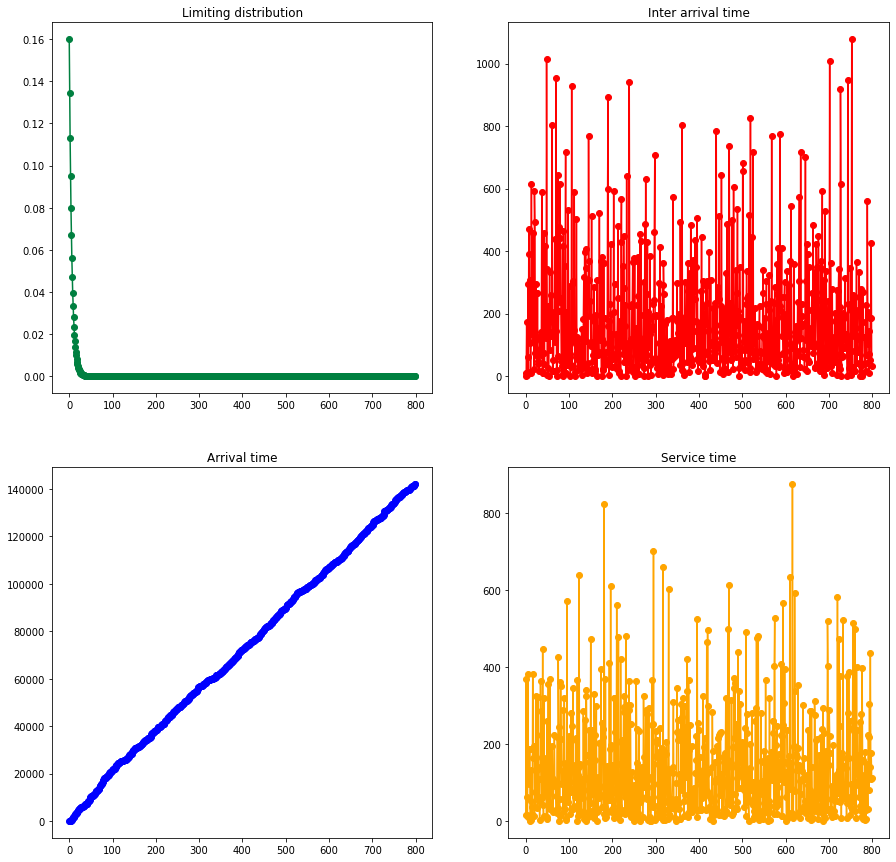

In [189]:
obj.visulising()